## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# Load dataset
df = pd.read_csv('ab_data.csv')

# Show the first five rows
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
num_rows = df.shape[0]
print('Number of rows in the dataset = {}.'.format(num_rows))

Number of rows in the dataset = 294478.


c. The number of unique users in the dataset.

In [4]:
unique_users = df.user_id.nunique()
print('Number of unique users in the dataset = {}.'.format(unique_users))

Number of unique users in the dataset = 290584.


d. The proportion of users converted.

In [5]:
prop_converted_users = df['converted'].mean()
print('Mean of unique users in the dataset = {}.'.format(prop_converted_users))

Mean of unique users in the dataset = 0.11965919355605512.


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# Number of times when group is treatment but langing page is old page
group_len1 = len(df.query('group == "treatment" & landing_page != "new_page"'))

# Number of times when group is not treatment but langing page is new page
group_len2 = len(df.query('group != "treatment" & landing_page == "new_page"'))

group_len = group_len1 + group_len2
print('Number of times the new_page and treatment don\'t line up = {}.'.format(group_len))

Number of times the new_page and treatment don't line up = 3893.


f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


#### The result show that there is no missing values in the dataset.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Remove rows which is mismatched
df2 = df.drop(df[((df.group == 'control') & (df.landing_page == 'new_page')) | \
                 ((df.group == 'treatment') & (df.landing_page != "new_page"))].index)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2_unique_users = df2.user_id.nunique()
print('Number of unique users in the new dataset = {}.'.format(df2_unique_users))

Number of unique users in the new dataset = 290584.


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
repeated_user = df2.user_id[df2['user_id'].duplicated()].iloc[0]
print('The repeated user id in  new dataset = {}.'.format(repeated_user))

The repeated user id in  new dataset = 773192.


c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2.user_id == repeated_user]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop(labels=1899, inplace=True)
df2[df2.user_id == repeated_user]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


#### Repeated row is removed

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
mean_converted = df2.converted.mean()
print('Mean of an individual converting regardless of the page they receive = {}.'.format(mean_converted))

Mean of an individual converting regardless of the page they receive = 0.11959708724499628.


b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
mean_converted_control = df2.query('group == "control"').converted.mean()
print('Mean of an individual was in the control group = an individual received the new page{}.'.format(mean_converted_control))

Mean of an individual was in the control group = an individual received the new page0.1203863045004612.


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
mean_converted_treatment = df2.query('group == "treatment"').converted.mean()
print('Mean of an individual was in the treatment group = {}.'.format(mean_converted_treatment))

Mean of an individual was in the treatment group = 0.11880806551510564.


d. What is the probability that an individual received the new page?

In [17]:
mean_new_page = (df2.landing_page == "new_page").mean()
print('Mean of an individual received the new page = {}.'.format(mean_new_page))

Mean of an individual received the new page = 0.5000619442226688.


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**ANS:**
After reviewing the previous possibilities, it becomes clear that there is not enough evidence to say that the new treatment page leads to more conversions, and it turns out that the probability of converting the control group is very little higher than the probability of converting the treatment group (mean_converted_control > mean_converted_treatment). So it is important to consider other factors.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null hypothesis: H0: Pnew − Pold ≤ 0** -----------
**Alternative hypothesis: H1: Pnew − Pold > 0**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
p_new = df2.converted.mean()
print('convert rate for  P𝑛𝑒𝑤  under the null = {}.'.format(p_new))

convert rate for  P𝑛𝑒𝑤  under the null = 0.11959708724499628.


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
p_old = df2.converted.mean()
print('convert rate for  𝑝𝑜𝑙𝑑  under the null = {}.'.format(p_old))

convert rate for  𝑝𝑜𝑙𝑑  under the null = 0.11959708724499628.


c. What is $n_{new}$?

In [20]:
n_new = df2.query('landing_page == "new_page"').shape[0]
print('N_𝑛𝑒𝑤 = {}.'.format(n_new))

N_𝑛𝑒𝑤 = 145310.


d. What is $n_{old}$?

In [21]:
n_old = df2.query('landing_page == "old_page"').shape[0]
print('N_old is {}.'.format(n_old))

N_old is 145274.


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_converted = np.random.choice([0, 1], size= n_new, p=[(1 - p_new), p_new])
print('Mean of new page converted = {}.'.format(new_page_converted.mean()))

Mean of new page converted = 0.12069368935379533.


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = np.random.choice([0, 1], size= n_old, p =[(1 - p_old), p_old])
print('Mean of new page converted = {}.'.format(old_page_converted.mean()))

Mean of new page converted = 0.11878932224623814.


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
p_diff = new_page_converted.mean() - old_page_converted.mean()
print('The difference between P_𝑛𝑒𝑤 and P_𝑜𝑙𝑑 = {}.'.format(p_diff))

The difference between P_𝑛𝑒𝑤 and P_𝑜𝑙𝑑 = 0.0019043671075571894.


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [25]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([0, 1], size= n_new, p=[(1 - p_new), p_new])
    old_page_converted = np.random.choice([0, 1], size= n_old, p =[(1 - p_old), p_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

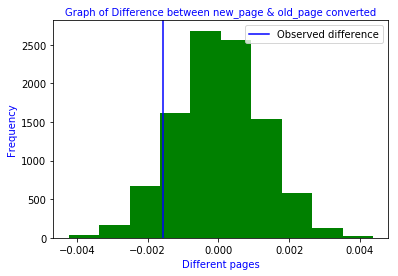

In [26]:
p_diffs = np.array(p_diffs)
obs_diff = mean_converted_treatment - mean_converted_control

# Draw p_diffs with histogram
plt.hist(p_diffs, color='green')
plt.title('Graph of Difference between new_page & old_page converted', fontsize = 10, color='blue')
plt.xlabel('Different pages', fontsize = 10, color='blue') 
plt.ylabel('Frequency', fontsize = 10, color='blue')
plt.axvline(obs_diff, color='blue', label = "Observed difference")
plt.legend();

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
p_value = (p_diffs > obs_diff).mean()
print('proportion of the p_diffs = {}.'.format(p_value))

proportion of the p_diffs = 0.9015.


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**ANS:** When calculating the value p-value. To reject the null hypothesis, the p-value must be greater than the agreed-upon p-value of the α-level of 0.05 (the agreed-upon level has a 5% chance of making a type I error if the null-value is true). But in this case, the computed p-value is 0.9, which is very large in case we fail to reject the null hypothesis. So we should keep the old page

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [28]:
import statsmodels.api as sm

convert_old = len(df2.query('landing_page == "old_page" & converted == 1'))
convert_new = len(df2.query('landing_page == "new_page" & converted == 1'))
n_old = len(df2.landing_page == "old_page")
n_new = len(df2.landing_page == "new_page")

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [29]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print('z_score = {} and p_value = {} '.format(z_score, p_value))

z_score = 1.2447321532209403 and p_value = 0.8933848886003657 


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**ANS:**

Z-score is a statistic that is used by measuring standard deviations from the mean used to calculate the p-value and to determine the conclusions of a hypothesis test.

The p-value means that we have 89% probability to get the observed difference, which is very large in case we fail to reject the null hypothesis. So we should keep the old page.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [30]:
import statsmodels.api as sm

# Create an intercept column
df2['intercept'] = 1

# Create dummy variables
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [31]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

# Fit the model 
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [32]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-04-17 19:22 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**ANS:** 
In this case  the p-value calculated here is 0.190

This is because the Logit Regression is based on Null: H0: Pnew − Pold == 0 -------- Alternative: H1: Pnew − Pold != 0.

In contrast to the second part which is based on Null: H0: Pnew − Pold ≤ 0 ----------- Alternative: H1: Pnew − Pold > 0.

0.190 is still greater than (0.05 ), so we fail to reject null hypothesis.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**ANS:** It's a good idea to think about other factors such as age, gender, country, or specific cultural behavior that may influence conversion rate. Adding more information about users may reveal the hidden value of the new version of the page, but the model can become more complex.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [33]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [34]:
# Show new data
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [35]:
# Save Countries data in dataframe
countries = pd.DataFrame(df_new.country.value_counts())
countries.head()

,country
US,203619
UK,72466
CA,14499


In [36]:
### Create the necessary dummy variables
df_new[['ca', 'uk', 'us']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,ca,uk,us
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [37]:
# Create an intercept column
df_new['intercept'] = 1

log_mod2 = sm.Logit(df_new['converted'], df_new[['intercept', 'uk', 'us']])

# Fit the model 
results = log_mod2.fit()

# Summary
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-04-17 19:22 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
uk             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
us             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
==================================================================

"""

**ANS:**
Again in this case, The p-values for the countries is 0.869 which above 0.05, so again we fail to reject the null hypothesis.
As a result, we conclude that countries do not significantly affect the differences in conversion rates.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [38]:
# Create new columns identifying the user with the converted country
df_new['us_ab_page'] = df_new['us'] * df_new['ab_page']
df_new['uk_ab_page'] = df_new['uk'] * df_new['ab_page']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,ca,uk,us,us_ab_page,uk_ab_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1


In [39]:
# Fit Your Linear Model And Obtain the Results
log_mod3 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'us', 'uk', 'us_ab_page', 'uk_ab_page']])
result = log_mod3.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-04-17 19:22 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
us             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
uk             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
us_ab_page     0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
uk_ab_page     0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
==================================================================

"""

**ANS:** we conclude that the value of the p-value of all variables (all above 0.05) conclude that the interactions between the page and the users' country do not have any significant effect on conversion.

<a id='conclusions'></a>
## Conclusions

The overall conclusion of the entire study is that we do not have sufficient evidence that new pages lead to more conversions than old pages.

So we will fail to reject the null and conclude that there is not sufficient evidence to suggest that there is an interaction between country and page received that will predict whether a user converts or not.

While there may be other specific user-related variables that would cause our null hypothesis to be rejected (and require additional resources/money and time), the results of the analysis so far might lead me to suggest removing the new page because it does not. Yes, it brings a lot of value and focuses on other things (maybe a whole new page with other features to test).